In [1]:
%pip install ultralytics

Note: you may need to restart the kernel to use updated packages.


In [2]:
# Import Essential Libraries
import os
import random
import pandas as pd # type: ignore
from PIL import Image # type: ignore
import cv2 # type: ignore
from ultralytics import YOLO # type: ignore
from IPython.display import Video # type: ignore
import numpy as np # type: ignore
import matplotlib.pyplot as plt # type: ignore
import seaborn as sns # type: ignore
sns.set(style='darkgrid')
import pathlib
import glob
from tqdm.notebook import trange, tqdm # type: ignore
import warnings
warnings.filterwarnings('ignore')

In [3]:
model = YOLO("yolo11n.pt")

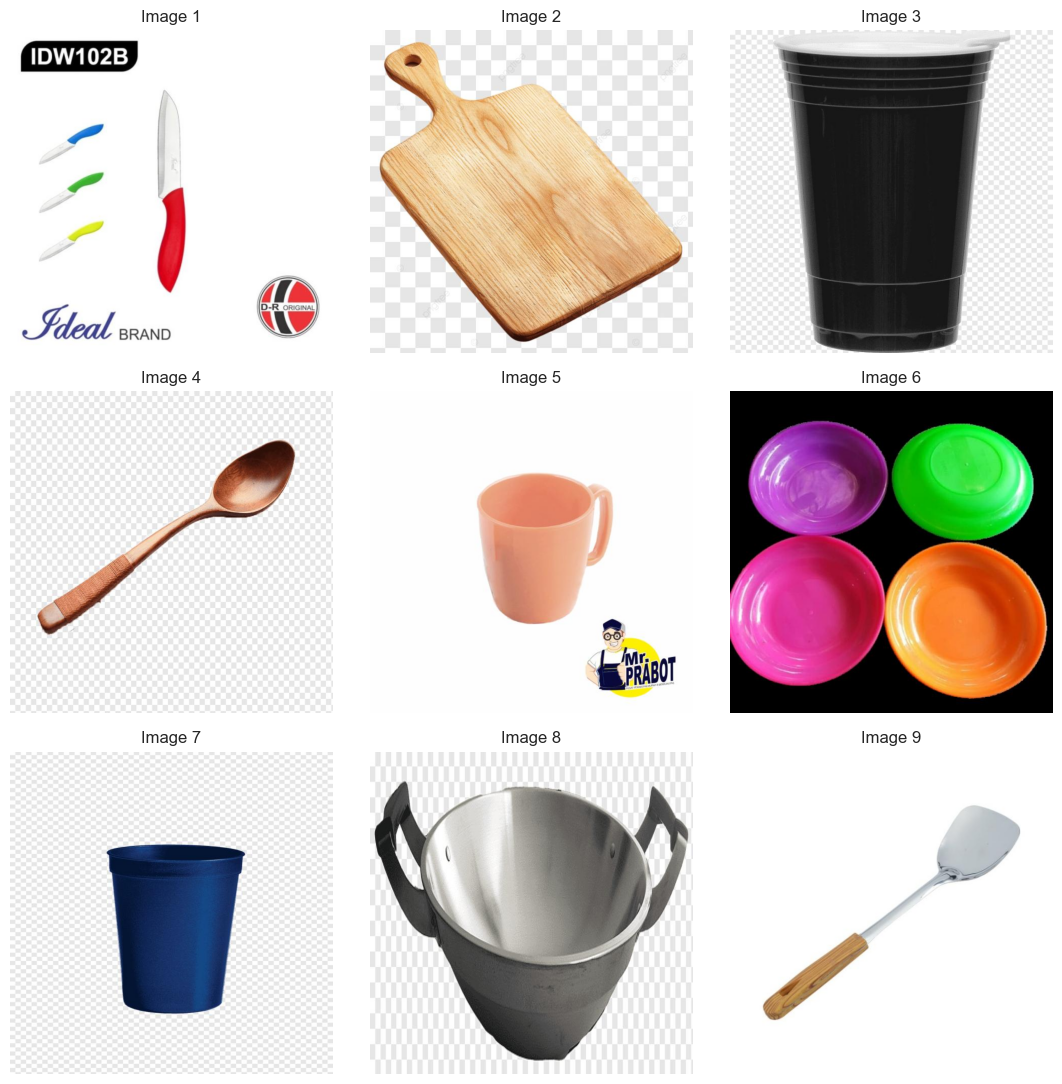

In [4]:
# Path ke folder di Google Drive
Image_dir = r'C:\Users\wahyu\Downloads\Perabotan\kitchen\test\images'

num_samples = 9
image_files = os.listdir(Image_dir)

# Randomly select num_samples images
rand_images = random.sample(image_files, num_samples)

fig, axes = plt.subplots(3, 3, figsize=(11, 11))

for i in range(num_samples):
    image = rand_images[i]
    ax = axes[i // 3, i % 3]
    ax.imshow(plt.imread(os.path.join(Image_dir, image)))
    ax.set_title(f'Image {i+1}')
    ax.axis('off')

plt.tight_layout()
plt.show()

In [5]:
# Get the size of the image
# Update the image path
image_path = r'C:\Users\wahyu\Perabotan\train/images/1d_jpg.rf.38847410258539166a526f71f4b993a5.jpg'

# Get the size of the image
image = cv2.imread(image_path)

# Check if the image was loaded successfully
if image is not None:
    h, w, c = image.shape
    print(f"The image has dimensions {w}x{h} and {c} channels.")
else:
    print("Error: Image not found or unable to load.")

The image has dimensions 640x640 and 3 channels.



0: 640x640 (no detections), 576.6ms
Speed: 13.6ms preprocess, 576.6ms inference, 6.9ms postprocess per image at shape (1, 3, 640, 640)


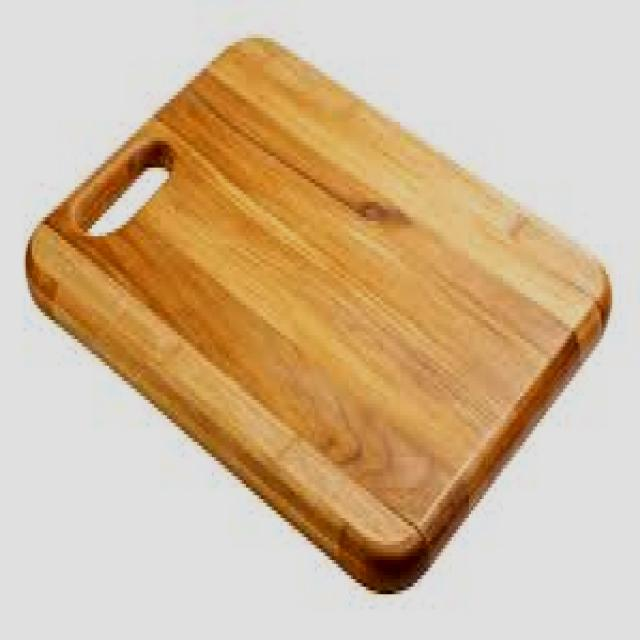

In [6]:
# Use a pretrained YOLOv8n model
model = YOLO("yolo11n.pt")

# Update the image path
image_path = r'C:\Users\wahyu\Perabotan\train/images/1g_jpg.rf.1cd8a513d86efa7c7e778b908b91b6a3.jpg'

# Get the size of the image
image = cv2.imread(image_path)

result_predict = model.predict(source = image, imgsz=(640))

# show results
plot = result_predict[0].plot()
plot = cv2.cvtColor(plot, cv2.COLOR_BGR2RGB)
display(Image.fromarray(plot))

In [7]:
# Build from YAML and transfer weights
Final_model = YOLO('yolo11n.pt')

# Training The Final Model
Result_Final_model = Final_model.train(data=r'C:\Users\wahyu\Downloads\Perabotan\kitchen\data.yaml', epochs=50, batch=-16, optimizer='auto')

New https://pypi.org/project/ultralytics/8.3.54 available  Update with 'pip install -U ultralytics'
Ultralytics 8.3.53  Python-3.10.11 torch-2.5.1+cpu CPU (Intel Core(TM) i5-10300H 2.50GHz)
engine\trainer: task=detect, mode=train, model=yolo11n.pt, data=C:\Users\wahyu\Downloads\Perabotan\kitchen\data.yaml, epochs=50, time=None, patience=100, batch=-16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train5, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, e

train: Scanning C:\Users\wahyu\Downloads\Perabotan\kitchen\train\labels.cache... 324 images, 0 backgrounds, 0 corrupt: 100%|██████████| 324/324 [00:00<?, ?it/s]

WARNING  Box and segment counts should be equal, but got len(segments) = 12, len(boxes) = 426. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.
AutoBatch: Computing optimal batch size for imgsz=640 at 60.0% CUDA memory utilization.
AutoBatch:   intended for CUDA devices, using default batch-size 16



train: Scanning C:\Users\wahyu\Downloads\Perabotan\kitchen\train\labels.cache... 324 images, 0 backgrounds, 0 corrupt: 100%|██████████| 324/324 [00:00<?, ?it/s]

WARNING  Box and segment counts should be equal, but got len(segments) = 12, len(boxes) = 426. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.



val: Scanning C:\Users\wahyu\Downloads\Perabotan\kitchen\valid\labels.cache... 31 images, 0 backgrounds, 0 corrupt: 100%|██████████| 31/31 [00:00<?, ?it/s]

WARNING  Box and segment counts should be equal, but got len(segments) = 2, len(boxes) = 36. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.
Plotting labels to runs\detect\train5\labels.jpg... 


optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000714, momentum=0.9) with parameter groups 81 weight(decay=0.0), 88 weight(decay=0.0005), 87 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 0 dataloader workers
Logging results to runs\detect\train5
Starting training for 50 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/50         0G      1.214      3.698      1.607         21        640: 100%|██████████| 21/21 [01:43<00:00,  4.92s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:04<00:00,  4.43s/it]

                   all         31         36     0.0191      0.667      0.157      0.106



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/50         0G      1.047      3.531      1.495         13        640: 100%|██████████| 21/21 [01:37<00:00,  4.66s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:04<00:00,  4.51s/it]

                   all         31         36     0.0154      0.967      0.283       0.19



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/50         0G     0.9834      3.195      1.446          8        640: 100%|██████████| 21/21 [01:42<00:00,  4.90s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:04<00:00,  4.51s/it]

                   all         31         36       0.93       0.02      0.355       0.26



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/50         0G      1.015      2.969      1.449         19        640: 100%|██████████| 21/21 [01:37<00:00,  4.64s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:04<00:00,  4.56s/it]

                   all         31         36      0.583      0.221      0.384      0.258



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/50         0G      1.084      2.674      1.488         13        640: 100%|██████████| 21/21 [01:40<00:00,  4.76s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:04<00:00,  4.32s/it]

                   all         31         36      0.488      0.411      0.321       0.19



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/50         0G      1.069      2.489      1.459          9        640: 100%|██████████| 21/21 [01:38<00:00,  4.70s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:04<00:00,  4.12s/it]

                   all         31         36      0.368      0.418      0.288      0.195



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/50         0G      1.044      2.259      1.471          8        640: 100%|██████████| 21/21 [01:37<00:00,  4.62s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:03<00:00,  3.57s/it]

                   all         31         36      0.576      0.438      0.457      0.322



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/50         0G     0.9774      2.122      1.426          5        640: 100%|██████████| 21/21 [01:37<00:00,  4.63s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:03<00:00,  3.56s/it]

                   all         31         36      0.474      0.544      0.478      0.343



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/50         0G     0.9966      1.904      1.425         12        640: 100%|██████████| 21/21 [01:37<00:00,  4.65s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:03<00:00,  3.50s/it]

                   all         31         36      0.624      0.384      0.472      0.355



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/50         0G      1.002      1.909      1.414         10        640: 100%|██████████| 21/21 [01:36<00:00,  4.60s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:03<00:00,  3.51s/it]

                   all         31         36      0.473      0.467      0.444       0.29



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/50         0G     0.9616       1.81      1.374         20        640: 100%|██████████| 21/21 [01:36<00:00,  4.61s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:03<00:00,  3.38s/it]

                   all         31         36       0.46      0.581      0.539      0.398



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/50         0G     0.9407      1.709      1.371          9        640: 100%|██████████| 21/21 [01:37<00:00,  4.63s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:03<00:00,  3.48s/it]

                   all         31         36      0.582       0.55      0.545      0.318



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/50         0G     0.9225       1.67      1.346         10        640: 100%|██████████| 21/21 [01:37<00:00,  4.66s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:03<00:00,  3.59s/it]

                   all         31         36      0.626      0.527      0.627      0.462



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/50         0G     0.8972      1.635      1.322         10        640: 100%|██████████| 21/21 [01:37<00:00,  4.64s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:03<00:00,  3.43s/it]

                   all         31         36       0.55      0.639      0.645      0.412



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/50         0G     0.8604      1.558      1.318         11        640: 100%|██████████| 21/21 [01:37<00:00,  4.65s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:03<00:00,  3.44s/it]

                   all         31         36        0.5      0.638      0.649      0.476



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/50         0G     0.8411      1.415      1.287          9        640: 100%|██████████| 21/21 [01:36<00:00,  4.61s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:03<00:00,  3.53s/it]

                   all         31         36      0.634       0.53      0.676        0.5



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/50         0G     0.8522       1.47      1.278          8        640: 100%|██████████| 21/21 [01:37<00:00,  4.64s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:03<00:00,  3.48s/it]

                   all         31         36      0.639      0.605      0.626      0.465



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/50         0G     0.8098      1.388       1.27         13        640: 100%|██████████| 21/21 [01:38<00:00,  4.68s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:03<00:00,  3.47s/it]

                   all         31         36      0.535      0.557      0.565      0.431



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/50         0G     0.8773      1.411      1.323          7        640: 100%|██████████| 21/21 [01:43<00:00,  4.91s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:06<00:00,  6.56s/it]

                   all         31         36      0.564      0.623      0.545      0.377



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/50         0G     0.8496      1.343      1.292         11        640: 100%|██████████| 21/21 [01:38<00:00,  4.70s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:03<00:00,  3.52s/it]

                   all         31         36      0.742      0.685      0.659      0.504



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/50         0G     0.8427        1.3      1.261         15        640: 100%|██████████| 21/21 [01:56<00:00,  5.53s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:03<00:00,  3.52s/it]

                   all         31         36       0.57      0.703      0.671      0.497



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/50         0G     0.8219      1.272      1.276         17        640: 100%|██████████| 21/21 [01:36<00:00,  4.59s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:03<00:00,  3.28s/it]

                   all         31         36      0.637       0.63      0.678      0.532



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/50         0G     0.8098      1.237      1.253         13        640: 100%|██████████| 21/21 [01:40<00:00,  4.80s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:03<00:00,  3.48s/it]

                   all         31         36      0.559       0.72      0.662        0.5



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/50         0G     0.8155      1.251      1.277          8        640: 100%|██████████| 21/21 [01:57<00:00,  5.59s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:03<00:00,  3.68s/it]

                   all         31         36      0.696      0.693      0.755      0.546



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/50         0G     0.7754      1.181       1.22         18        640: 100%|██████████| 21/21 [02:34<00:00,  7.35s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:05<00:00,  5.30s/it]

                   all         31         36      0.715      0.663      0.718      0.561



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/50         0G     0.7667      1.133      1.215         13        640: 100%|██████████| 21/21 [02:28<00:00,  7.09s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:03<00:00,  3.31s/it]

                   all         31         36      0.697        0.7      0.714      0.548



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/50         0G     0.7655      1.118      1.229         16        640: 100%|██████████| 21/21 [01:49<00:00,  5.23s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:03<00:00,  3.63s/it]

                   all         31         36      0.678      0.673       0.67      0.525



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/50         0G     0.7601      1.097      1.196         18        640: 100%|██████████| 21/21 [02:18<00:00,  6.58s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:05<00:00,  5.09s/it]

                   all         31         36      0.658      0.673      0.651       0.51



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/50         0G     0.7689      1.064      1.204         16        640: 100%|██████████| 21/21 [02:45<00:00,  7.86s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:04<00:00,  4.71s/it]

                   all         31         36      0.723      0.654      0.709      0.573



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/50         0G     0.7598      1.108      1.235         10        640: 100%|██████████| 21/21 [02:48<00:00,  8.04s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:04<00:00,  4.38s/it]

                   all         31         36      0.771      0.543      0.629      0.489



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/50         0G     0.7419      1.075      1.236          7        640: 100%|██████████| 21/21 [02:06<00:00,  6.04s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:04<00:00,  4.90s/it]

                   all         31         36      0.498      0.745      0.628      0.484



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/50         0G      0.731      1.064      1.217         14        640: 100%|██████████| 21/21 [02:30<00:00,  7.19s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:04<00:00,  4.42s/it]

                   all         31         36      0.725      0.684      0.716      0.573



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/50         0G       0.71      1.018      1.172         16        640: 100%|██████████| 21/21 [02:23<00:00,  6.84s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:04<00:00,  4.98s/it]

                   all         31         36      0.857      0.648      0.732      0.574



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/50         0G     0.6901     0.9452      1.159         15        640: 100%|██████████| 21/21 [02:10<00:00,  6.19s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:03<00:00,  3.88s/it]

                   all         31         36      0.758      0.675      0.708      0.562



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/50         0G     0.6969     0.9692      1.176         10        640: 100%|██████████| 21/21 [02:19<00:00,  6.65s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:04<00:00,  4.01s/it]

                   all         31         36       0.78      0.628      0.692       0.54



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/50         0G     0.6993      1.015      1.195          5        640: 100%|██████████| 21/21 [02:38<00:00,  7.53s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:05<00:00,  5.19s/it]

                   all         31         36      0.828       0.66      0.706       0.56



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/50         0G     0.6679     0.9177      1.163         14        640: 100%|██████████| 21/21 [02:39<00:00,  7.60s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:04<00:00,  4.20s/it]

                   all         31         36      0.824      0.675      0.733      0.582



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      38/50         0G     0.6668     0.9071      1.146         10        640: 100%|██████████| 21/21 [02:21<00:00,  6.72s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:04<00:00,  4.16s/it]

                   all         31         36      0.842       0.68      0.731      0.582



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      39/50         0G     0.6513     0.8701      1.134         14        640: 100%|██████████| 21/21 [02:18<00:00,  6.61s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:04<00:00,  4.38s/it]

                   all         31         36      0.739      0.671      0.745        0.6



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      40/50         0G     0.7011     0.9116      1.182         12        640: 100%|██████████| 21/21 [02:27<00:00,  7.02s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:04<00:00,  4.99s/it]

                   all         31         36      0.871      0.585      0.747      0.601


Closing dataloader mosaic

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      41/50         0G     0.5343      1.015      1.126          6        640: 100%|██████████| 21/21 [02:17<00:00,  6.53s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:04<00:00,  4.26s/it]

                   all         31         36       0.81      0.627      0.744      0.588



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      42/50         0G     0.5371      1.001       1.11          7        640: 100%|██████████| 21/21 [02:20<00:00,  6.69s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:04<00:00,  4.17s/it]

                   all         31         36      0.905      0.645      0.754      0.596



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      43/50         0G     0.4932     0.9285      1.097          5        640: 100%|██████████| 21/21 [02:28<00:00,  7.09s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:04<00:00,  4.22s/it]

                   all         31         36      0.909      0.605       0.74      0.592



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      44/50         0G     0.4665     0.8412      1.097          5        640: 100%|██████████| 21/21 [02:43<00:00,  7.81s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:04<00:00,  4.22s/it]

                   all         31         36      0.879      0.623      0.735      0.585



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      45/50         0G       0.47     0.8278      1.052          4        640: 100%|██████████| 21/21 [02:20<00:00,  6.67s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:04<00:00,  4.75s/it]

                   all         31         36      0.905      0.597      0.734      0.569



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      46/50         0G     0.4841     0.8655      1.083          5        640: 100%|██████████| 21/21 [02:37<00:00,  7.51s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:04<00:00,  4.22s/it]

                   all         31         36      0.894      0.616      0.735      0.598



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      47/50         0G     0.4174     0.7911      1.029          4        640: 100%|██████████| 21/21 [02:18<00:00,  6.59s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:04<00:00,  4.16s/it]

                   all         31         36      0.829      0.659      0.739       0.59



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      48/50         0G     0.4361     0.7881      1.045          6        640: 100%|██████████| 21/21 [02:27<00:00,  7.01s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:04<00:00,  4.23s/it]

                   all         31         36      0.857      0.647      0.743      0.592



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      49/50         0G     0.4301     0.7697      1.035          4        640: 100%|██████████| 21/21 [02:19<00:00,  6.66s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:05<00:00,  5.18s/it]

                   all         31         36      0.864      0.655      0.748      0.601



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      50/50         0G     0.4359     0.8095      1.065          6        640: 100%|██████████| 21/21 [02:09<00:00,  6.19s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:04<00:00,  4.13s/it]

                   all         31         36      0.874       0.67      0.754       0.61



50 epochs completed in 1.778 hours.
Optimizer stripped from runs\detect\train5\weights\last.pt, 5.5MB
Optimizer stripped from runs\detect\train5\weights\best.pt, 5.5MB

Validating runs\detect\train5\weights\best.pt...
Ultralytics 8.3.53  Python-3.10.11 torch-2.5.1+cpu CPU (Intel Core(TM) i5-10300H 2.50GHz)
YOLO11n summary (fused): 238 layers, 2,584,102 parameters, 0 gradients, 6.3 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:03<00:00,  3.52s/it]


                   all         31         36      0.876       0.67      0.754      0.611
               Cangkir          3          3      0.731          1      0.995       0.83
                 Garpu          5          5      0.732        0.6      0.803      0.503
                 Gelas          6          6      0.987      0.667      0.913      0.735
               Mangkok          3          3      0.716      0.667      0.863      0.737
                Piring          4          4      0.997          1      0.995       0.87
                 Pisau          3          3          1          0     0.0343     0.0277
                Sendok          4          5      0.884        0.6      0.777      0.594
               Spatula          2          2      0.831        0.5      0.495      0.446
               Talenan          3          3      0.934      0.667      0.671      0.569
                 Wajan          2          2      0.952          1      0.995      0.796
Speed: 1.8ms preproce

In [8]:
# Configure the visual appearance of Seaborn plots
sns.set(rc={'axes.facecolor': '#eae8fa'}, style='darkgrid')

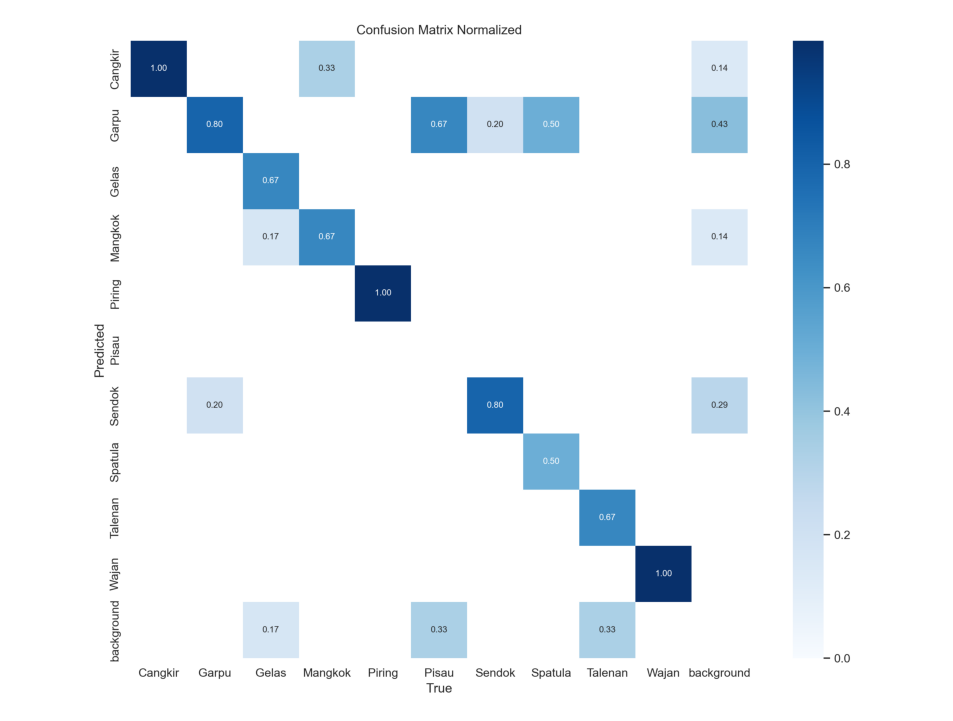

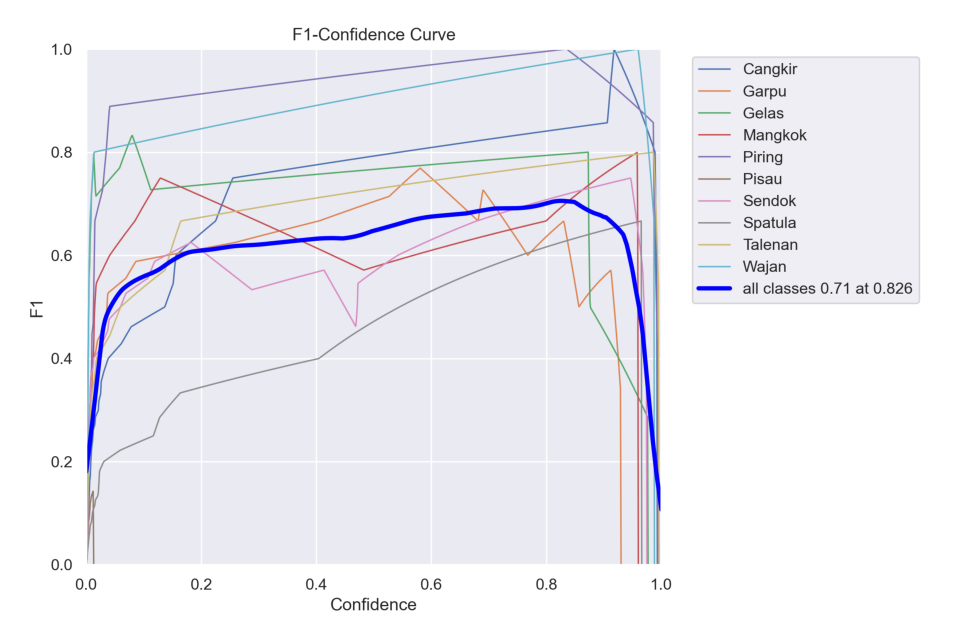

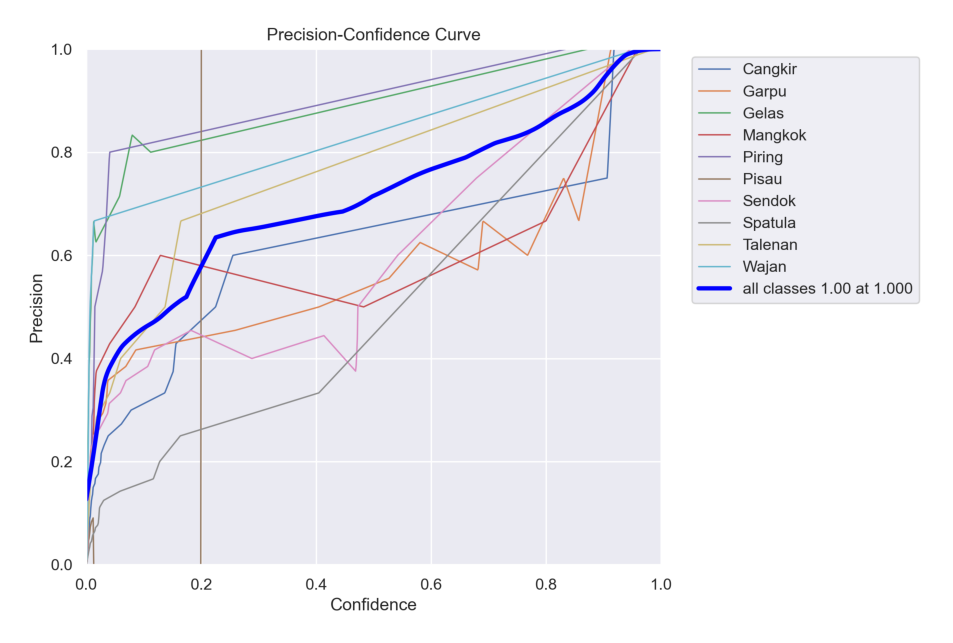

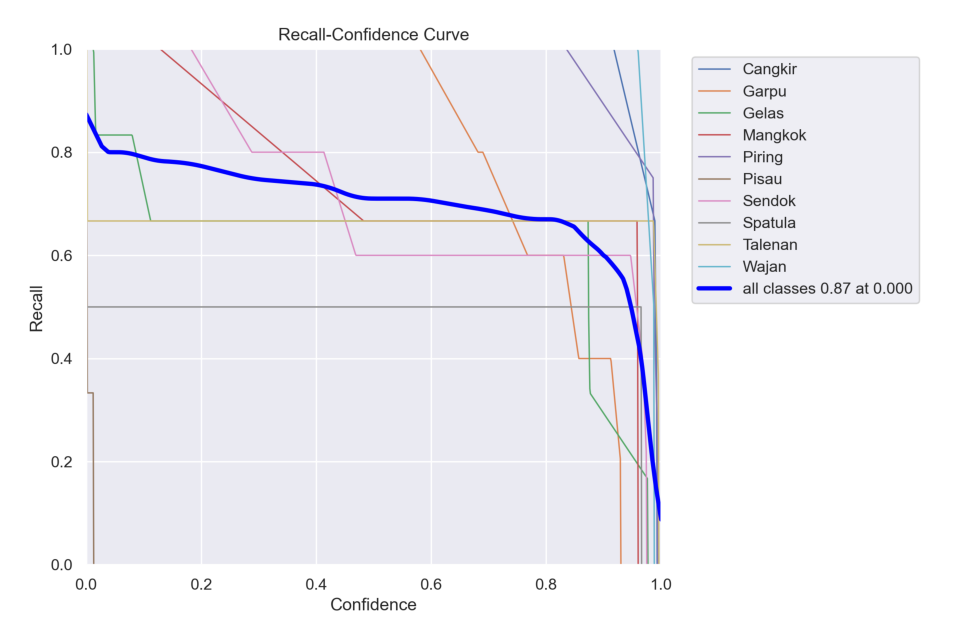

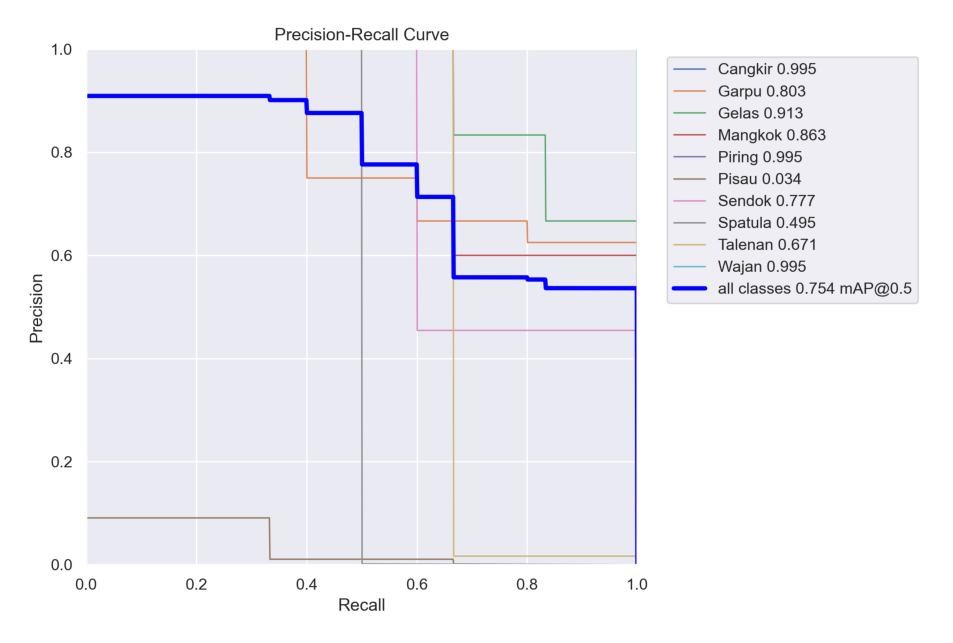

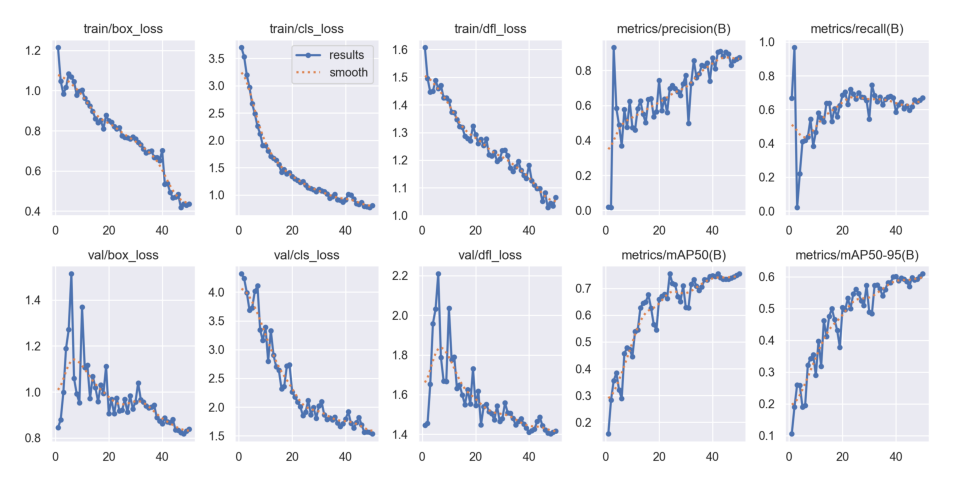

In [10]:
import os
import cv2 # type: ignore
import matplotlib.pyplot as plt # type: ignore

def display_images(post_training_files_path, image_files):

    for image_file in image_files:
        image_path = os.path.join(post_training_files_path, image_file)
        img = cv2.imread(image_path)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

        plt.figure(figsize=(10, 10), dpi=120)
        plt.imshow(img)
        plt.axis('off')
        plt.show()

# List of image files to display
image_files = [
    'confusion_matrix_normalized.png',
    'F1_curve.png',
    'P_curve.png',
    'R_curve.png',
    'PR_curve.png',
    'results.png'
]

# Path to the directory containing the images
post_training_files_path = 'runs/detect/train5'

# Display the images
display_images(post_training_files_path, image_files)

In [12]:
Result_Final_model = pd.read_csv('runs/detect/train5/results.csv')
Result_Final_model.tail(10)

epoch     time  train/box_loss  train/cls_loss  train/dfl_loss  \
40     41  5048.88         0.53433         1.01529         1.12638   
41     42  5194.19         0.53706         1.00120         1.10984   
42     43  5347.93         0.49319         0.92850         1.09747   
43     44  5516.71         0.46654         0.84119         1.09726   
44     45  5662.33         0.47001         0.82775         1.05190   
45     46  5824.94         0.48405         0.86546         1.08285   
46     47  5968.12         0.41739         0.79115         1.02858   
47     48  6120.16         0.43614         0.78808         1.04525   
48     49  6265.87         0.43012         0.76967         1.03548   
49     50  6400.62         0.43587         0.80949         1.06495   

    metrics/precision(B)  metrics/recall(B)  metrics/mAP50(B)  \
40               0.81009            0.62742           0.74385   
41               0.90453            0.64485           0.75450   
42               0.90888            0.60471           0.73977   
43               0.87946            0.62264           0.73501   
44               0.90532            0.59721           0.73370   
45               0.89359            0.61613           0.73472   
46               0.82948            0.65906           0.73940   
47               0.85652            0.64712           0.74268   
48               0.86420            0.65535           0.74829   
49               0.87397            0.67000           0.75416   

    metrics/mAP50-95(B)  val/box_loss  val/cls_loss  val/dfl_loss    lr/pg0  \
40              0.58808       0.88626       1.91857       1.41824  0.000149   
41              0.59607       0.87051       1.71641       1.42537  0.000134   
42              0.59224       0.86670       1.64042       1.46462  0.000120   
43              0.58524       0.88000       1.72804       1.48701  0.000106   
44              0.56926       0.83466       1.82227       1.44412  0.000092   
45              0.59782       0.83385       1.68767       1.42210  0.000078   
46              0.58964       0.82284       1.56464       1.40592  0.000064   
47              0.59226       0.81802       1.57104       1.40264  0.000050   
48              0.60135       0.83059       1.56081       1.41126  0.000035   
49              0.60971       0.83745       1.53627       1.41681  0.000021   

      lr/pg1    lr/pg2  
40  0.000149  0.000149  
41  0.000134  0.000134  
42  0.000120  0.000120  
43  0.000106  0.000106  
44  0.000092  0.000092  
45  0.000078  0.000078  
46  0.000064  0.000064  
47  0.000050  0.000050  
48  0.000035  0.000035  
49  0.000021  0.000021

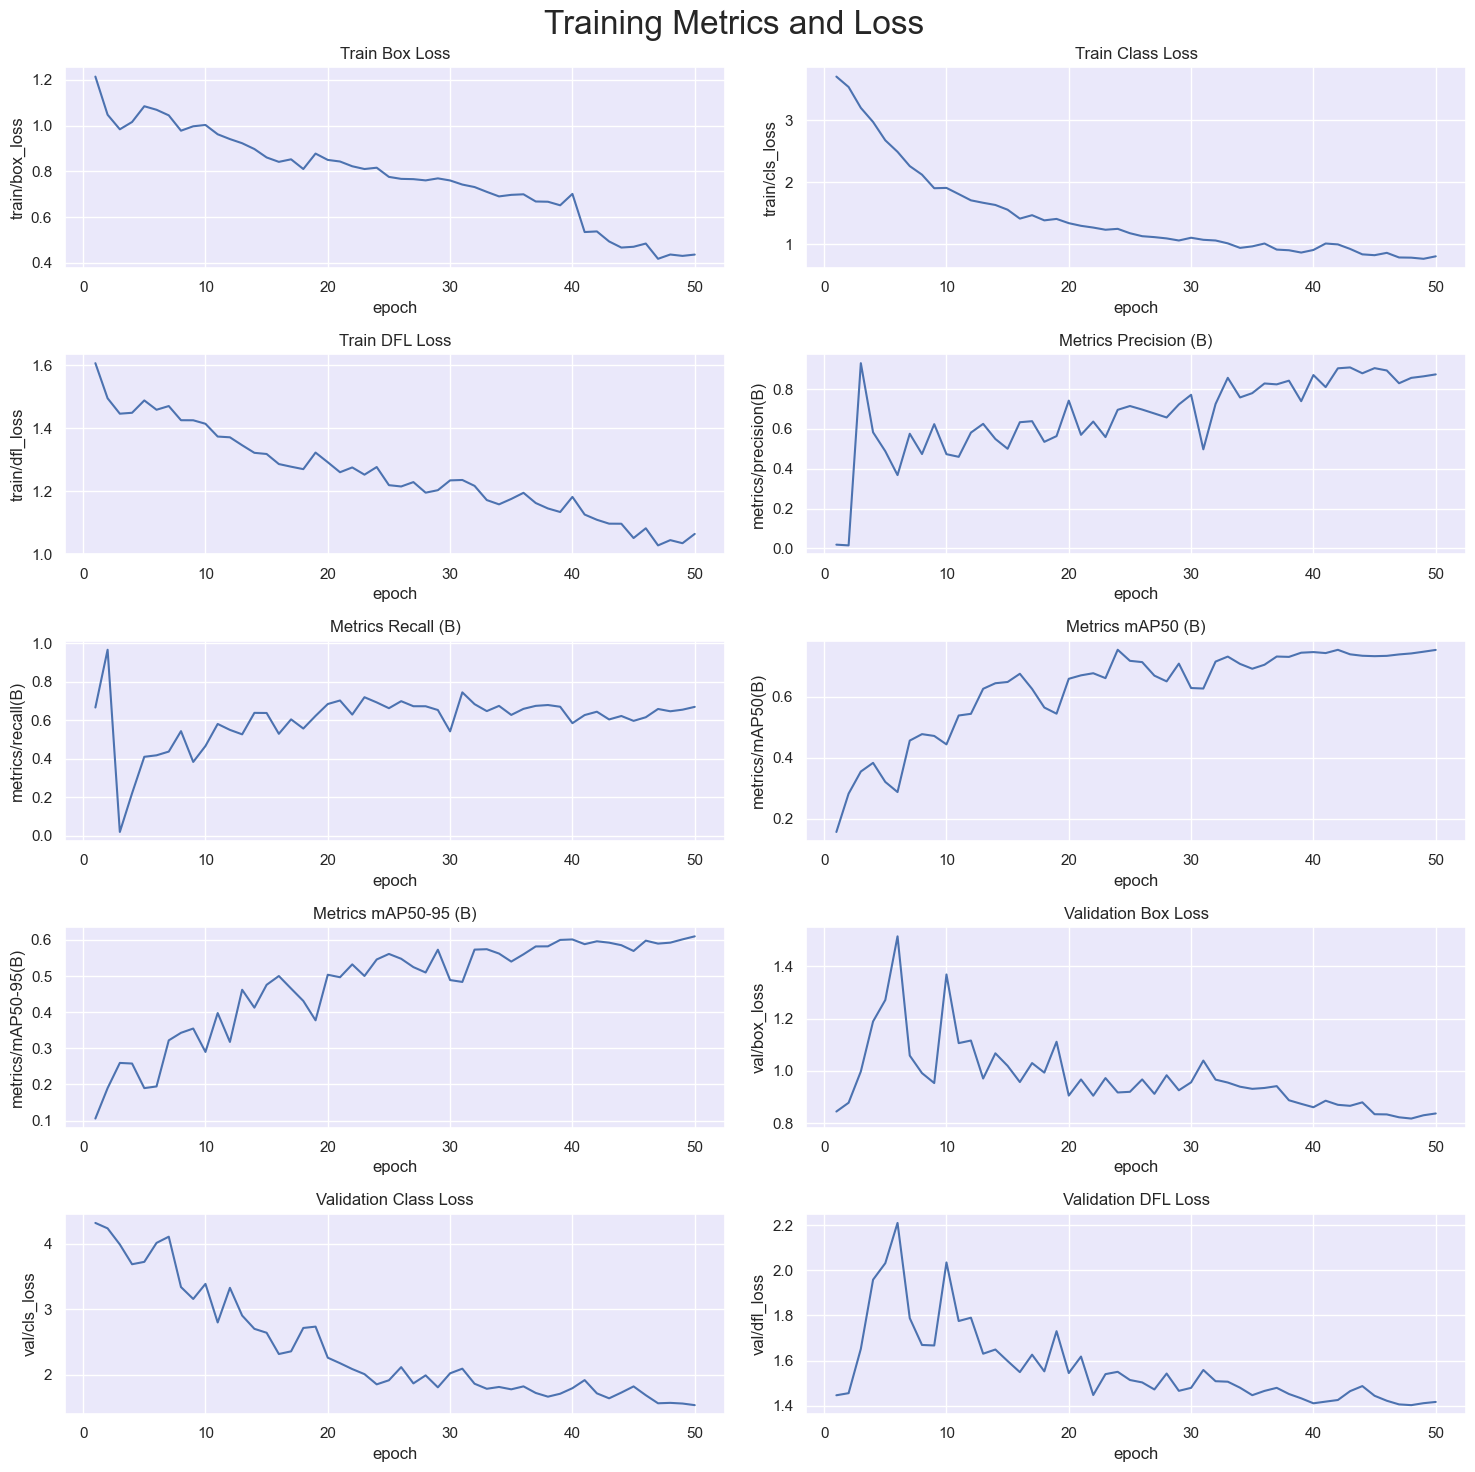

In [13]:
# Read the results.csv file as a pandas dataframe
Result_Final_model.columns = Result_Final_model.columns.str.strip()

# Create subplots
fig, axs = plt.subplots(nrows=5, ncols=2, figsize=(15, 15))

# Plot the columns using seaborn
sns.lineplot(x='epoch', y='train/box_loss', data=Result_Final_model, ax=axs[0,0])
sns.lineplot(x='epoch', y='train/cls_loss', data=Result_Final_model, ax=axs[0,1])
sns.lineplot(x='epoch', y='train/dfl_loss', data=Result_Final_model, ax=axs[1,0])
sns.lineplot(x='epoch', y='metrics/precision(B)', data=Result_Final_model, ax=axs[1,1])
sns.lineplot(x='epoch', y='metrics/recall(B)', data=Result_Final_model, ax=axs[2,0])
sns.lineplot(x='epoch', y='metrics/mAP50(B)', data=Result_Final_model, ax=axs[2,1])
sns.lineplot(x='epoch', y='metrics/mAP50-95(B)', data=Result_Final_model, ax=axs[3,0])
sns.lineplot(x='epoch', y='val/box_loss', data=Result_Final_model, ax=axs[3,1])
sns.lineplot(x='epoch', y='val/cls_loss', data=Result_Final_model, ax=axs[4,0])
sns.lineplot(x='epoch', y='val/dfl_loss', data=Result_Final_model, ax=axs[4,1])

# Set titles and axis labels for each subplot
axs[0,0].set(title='Train Box Loss')
axs[0,1].set(title='Train Class Loss')
axs[1,0].set(title='Train DFL Loss')
axs[1,1].set(title='Metrics Precision (B)')
axs[2,0].set(title='Metrics Recall (B)')
axs[2,1].set(title='Metrics mAP50 (B)')
axs[3,0].set(title='Metrics mAP50-95 (B)')
axs[3,1].set(title='Validation Box Loss')
axs[4,0].set(title='Validation Class Loss')
axs[4,1].set(title='Validation DFL Loss')


plt.suptitle('Training Metrics and Loss', fontsize=24)
plt.subplots_adjust(top=0.8)
plt.tight_layout()
plt.show()

In [14]:
# Loading the best performing model
Valid_model = YOLO('runs/detect/train5/weights/best.pt')

In [15]:
# Evaluating the model on the validset
metrics = Valid_model.val(split = 'val')

# final results
print("precision(B): ", metrics.results_dict["metrics/precision(B)"])
print("metrics/recall(B): ", metrics.results_dict["metrics/recall(B)"])
print("metrics/mAP50(B): ", metrics.results_dict["metrics/mAP50(B)"])
print("metrics/mAP50-95(B): ", metrics.results_dict["metrics/mAP50-95(B)"])

Ultralytics 8.3.53  Python-3.10.11 torch-2.5.1+cpu CPU (Intel Core(TM) i5-10300H 2.50GHz)
YOLO11n summary (fused): 238 layers, 2,584,102 parameters, 0 gradients, 6.3 GFLOPs


val: Scanning C:\Users\wahyu\Downloads\Perabotan\kitchen\valid\labels.cache... 31 images, 0 backgrounds, 0 corrupt: 100%|██████████| 31/31 [00:00<?, ?it/s]

WARNING  Box and segment counts should be equal, but got len(segments) = 2, len(boxes) = 36. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:04<00:00,  2.49s/it]


                   all         31         36      0.876       0.67      0.754      0.611
               Cangkir          3          3      0.731          1      0.995       0.83
                 Garpu          5          5      0.732        0.6      0.803      0.503
                 Gelas          6          6      0.987      0.667      0.913      0.735
               Mangkok          3          3      0.716      0.667      0.863      0.737
                Piring          4          4      0.997          1      0.995       0.87
                 Pisau          3          3          1          0     0.0343     0.0277
                Sendok          4          5      0.884        0.6      0.777      0.594
               Spatula          2          2      0.831        0.5      0.495      0.446
               Talenan          3          3      0.934      0.667      0.671      0.569
                 Wajan          2          2      0.952          1      0.995      0.796
Speed: 2.6ms preproce


0: 640x640 4 Pirings, 152.7ms
Speed: 0.0ms preprocess, 152.7ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Cangkir, 149.5ms
Speed: 14.4ms preprocess, 149.5ms inference, 2.4ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Gelas, 170.1ms
Speed: 4.0ms preprocess, 170.1ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Gelas, 148.8ms
Speed: 4.4ms preprocess, 148.8ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Sendok, 177.5ms
Speed: 6.7ms preprocess, 177.5ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Sendok, 229.9ms
Speed: 7.8ms preprocess, 229.9ms inference, 3.0ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Garpu, 239.7ms
Speed: 5.6ms preprocess, 239.7ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Piring, 250.2ms
Speed: 4.2ms preprocess, 250.2ms inference, 0.0ms postprocess per image at

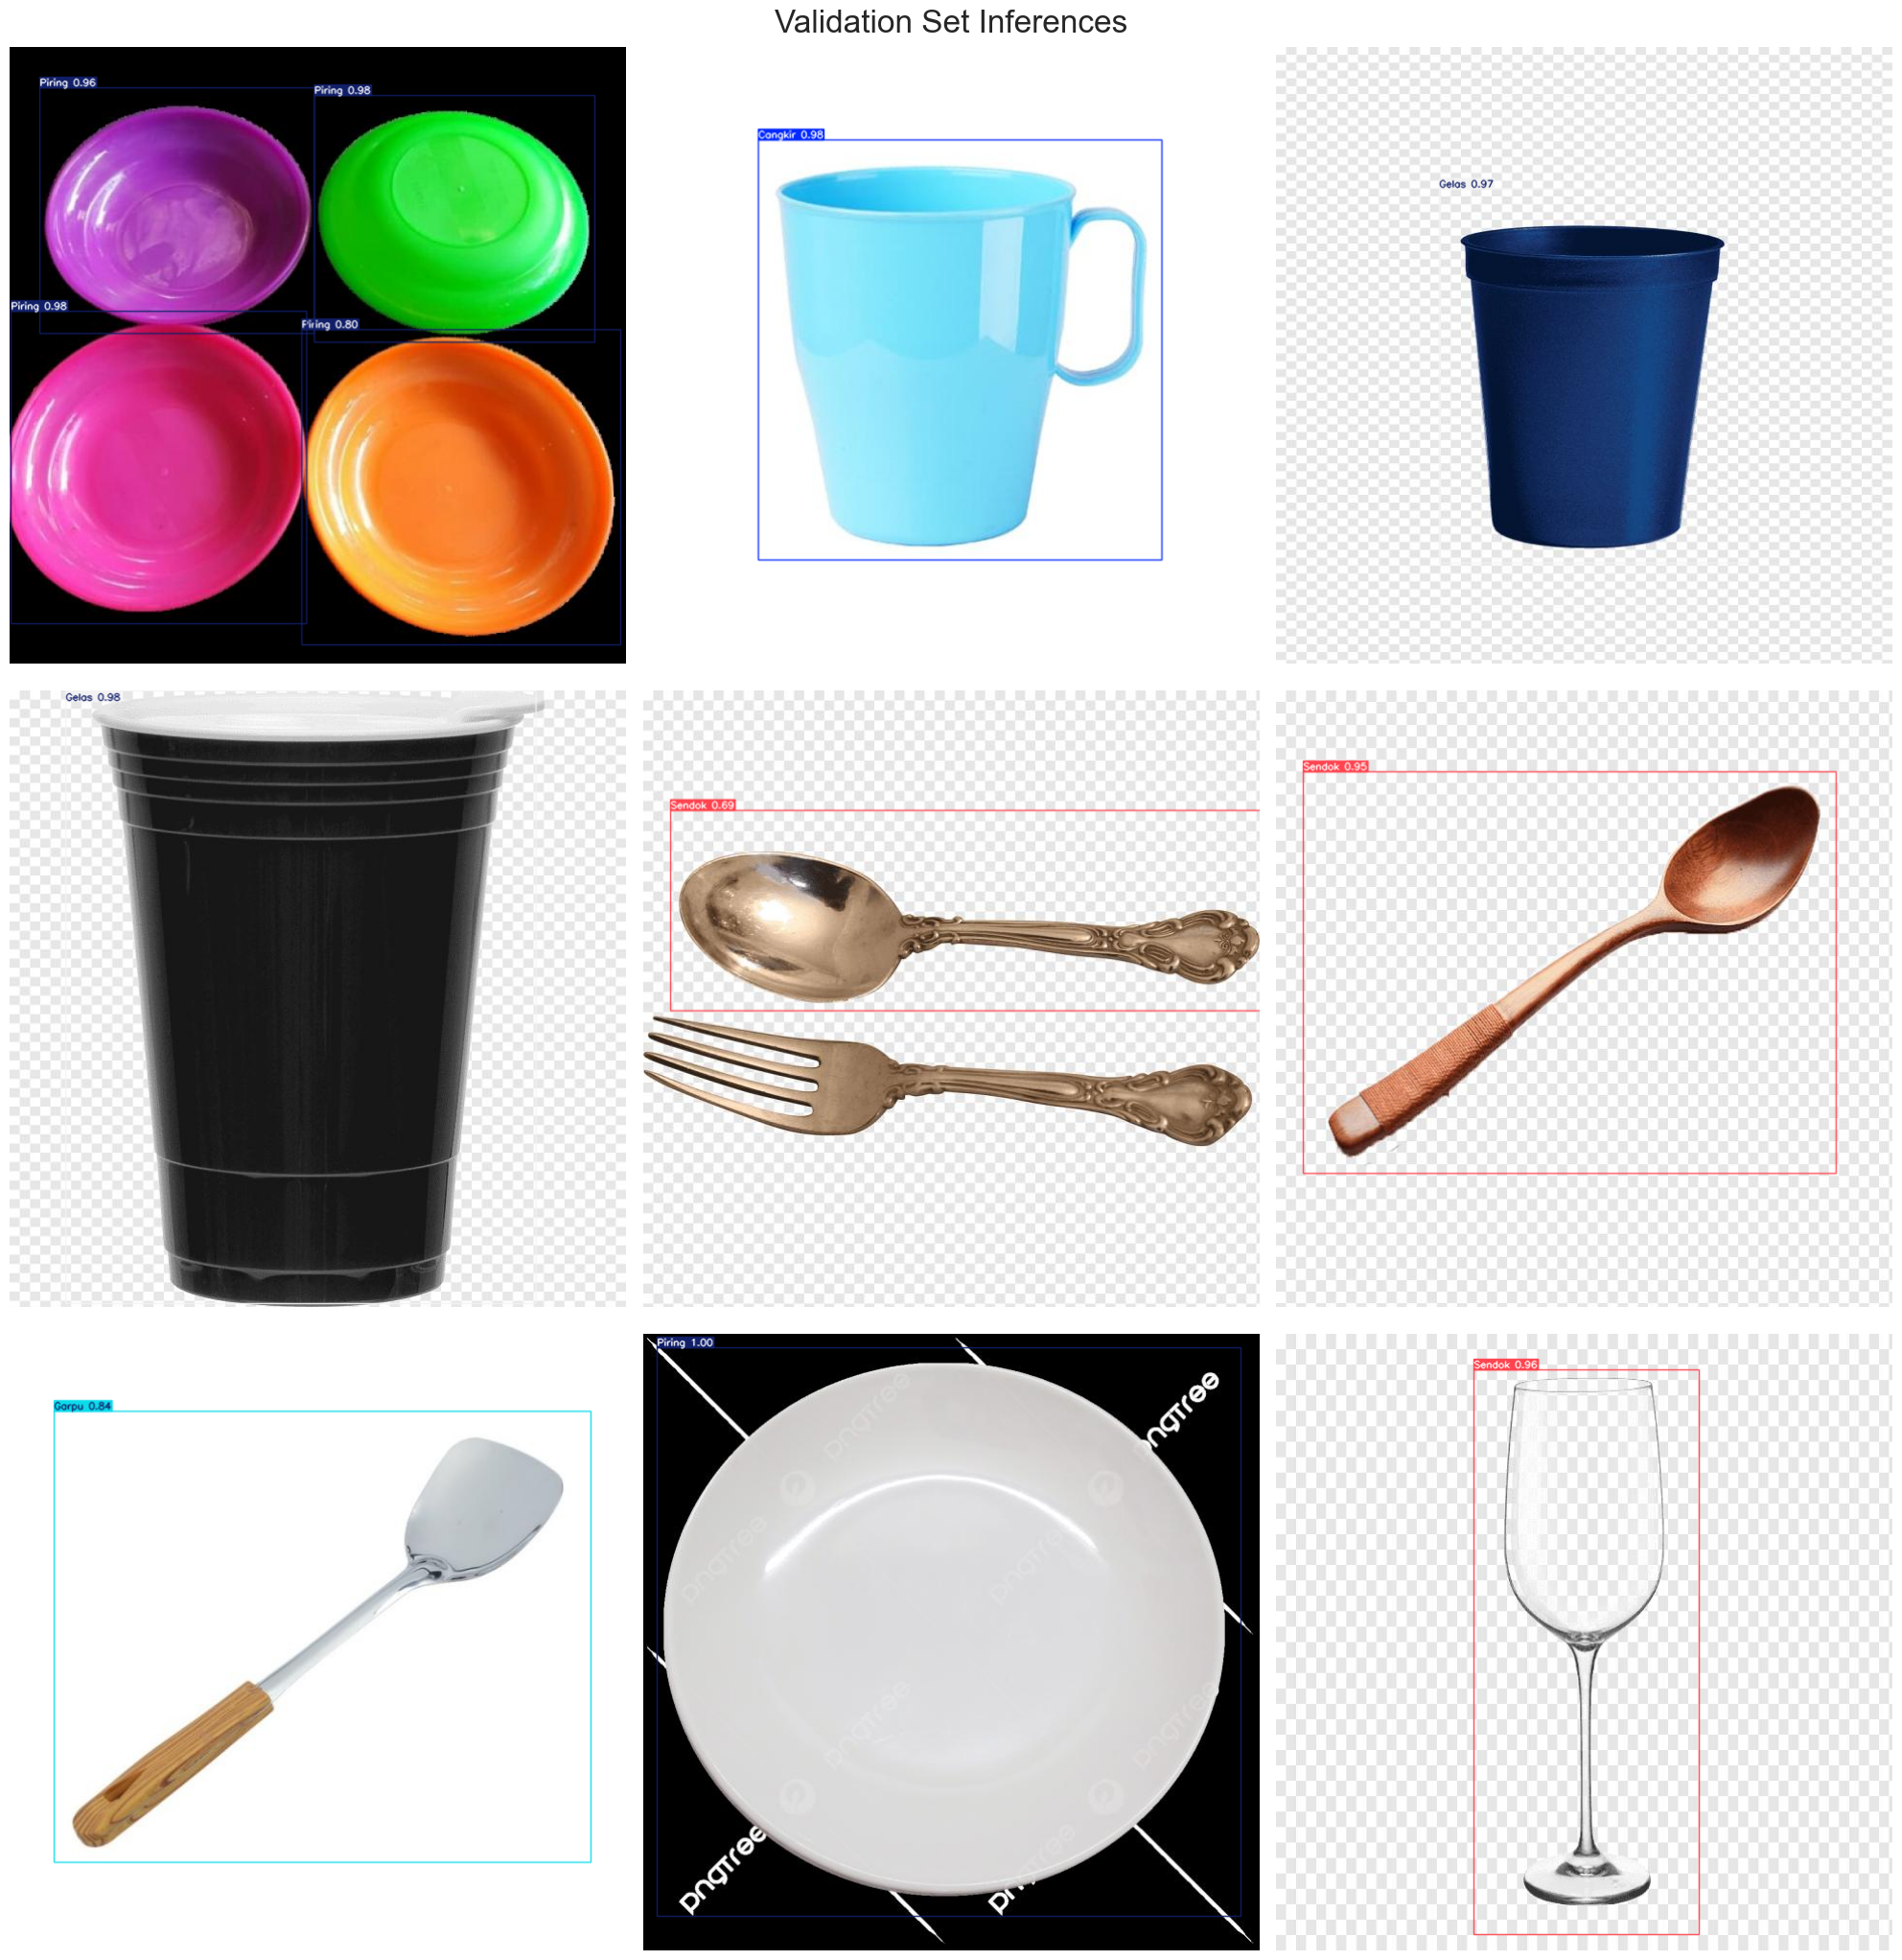

In [17]:
# Normalization function
def normalize_image(image):
    return image / 255.0

# Image resizing function
def resize_image(image, size=(640, 640)):
    return cv2.resize(image, size)

# Path to validation images
dataset_path = r'C:\Users\wahyu\Perabotan'  # Place your dataset path here
valid_images_path = os.path.join(dataset_path, 'test', 'images')

# List of all jpg images in the directory
image_files = [file for file in os.listdir(valid_images_path) if file.endswith('.jpg')]

# Check if there are images in the directory
if len(image_files) > 0:
    # Select 9 images at equal intervals
    num_images = len(image_files)
    step_size = max(1, num_images // 9)  # Ensure the interval is at least 1
    selected_images = [image_files[i] for i in range(0, num_images, step_size)]

    # Prepare subplots
    fig, axes = plt.subplots(3, 3, figsize=(20, 21))
    fig.suptitle('Validation Set Inferences', fontsize=24)

    for i, ax in enumerate(axes.flatten()):
        if i < len(selected_images):
            image_path = os.path.join(valid_images_path, selected_images[i])

            # Load image
            image = cv2.imread(image_path)

            # Check if the image is loaded correctly
            if image is not None:
                # Resize image
                resized_image = resize_image(image, size=(640, 640))
                # Normalize image
                normalized_image = normalize_image(resized_image)

                # Convert the normalized image to uint8 data type
                normalized_image_uint8 = (normalized_image * 255).astype(np.uint8)

                # Predict with the model
                results = Valid_model.predict(source=normalized_image_uint8, imgsz=640, conf=0.5)

                # Plot image with labels
                annotated_image = results[0].plot(line_width=1)
                annotated_image_rgb = cv2.cvtColor(annotated_image, cv2.COLOR_BGR2RGB)
                ax.imshow(annotated_image_rgb)
            else:
                print(f"Failed to load image {image_path}")
        ax.axis('off')

    plt.tight_layout()
    plt.show()